In [1]:
from pymoo.problems import get_problem
from tqdm import tqdm
import pandas as pd
from utils import *
from pymoo.vendor.vendor_coco import COCOProblem
import random
import os
import seaborn as sns

In [2]:
dim=5
n_samples=100
n_evals = 500

In [3]:
dfs = []

for coco_problem in range(1, 25, 3):
    for coco_instance in range(1, 7):
        problem = COCOProblem(f"bbob-f{coco_problem}-{coco_instance}", n_var=dim)
        data = run_algorithms(problem, algorithms=['GA', 'CMAES'], n_eval=n_evals)
        df = pd.DataFrame(data)
        df['problem_class'] = coco_problem
        df['problem_instance'] = coco_instance
        df['optimum'] = problem.evaluate(problem.pareto_set())[0,0]
        sampling = LHS()
        X = sampling(problem, dim*n_samples).get("X")
        y = problem.evaluate(X).flatten()
        dfs.append(df)
df = pd.concat(dfs)      

Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals
Using 2500 evals


In [4]:
df

,GA,CMAES,algorithm_run,problem_class,problem_instance,optimum
0,79.480059,79.480000,0,1,1,79.48
1,79.480040,79.480000,1,1,1,79.48
2,79.480016,79.480000,2,1,1,79.48
3,79.480055,79.480000,3,1,1,79.48
4,79.480178,79.480000,4,1,1,79.48
...,...,...,...,...,...,...
5,19.326074,16.942751,5,22,6,8.20
6,8.328352,38.282211,6,22,6,8.20
7,8.502840,8.891857,7,22,6,8.20
8,8.229167,8.200000,8,22,6,8.20


In [5]:
df['GA_perf'] = df['GA']-df['optimum']
df['CMAES_perf'] = df['CMAES']-df['optimum']

In [6]:
gdf = df.groupby(['problem_class', 'problem_instance']).mean().reset_index()
gdf

,problem_class,problem_instance,GA,CMAES,algorithm_run,optimum,GA_perf,CMAES_perf
0,1,1,79.480072,79.480000,4.5,79.48,0.000072,8.526513e-15
1,1,2,394.480100,394.480000,4.5,394.48,0.000100,0.000000e+00
2,1,3,-247.109934,-247.110000,4.5,-247.11,0.000066,2.842171e-15
3,1,4,-152.039894,-152.040000,4.5,-152.04,0.000106,2.842171e-15
4,1,5,-25.249925,-25.250000,4.5,-25.25,0.000075,6.039613e-15
5,1,6,-23.649923,-23.650000,4.5,-23.65,0.000077,1.065814e-14
6,4,1,-461.771803,-455.360062,4.5,-462.09,0.318197,6.729938e+00
7,4,2,78.222126,84.127229,4.5,77.66,0.562126,6.467229e+00
8,4,3,116.292993,122.545212,4.5,115.68,0.612993,6.865212e+00
9,4,4,-3.442920,1.946979,4.5,-3.71,0.267080,5.656979e+00


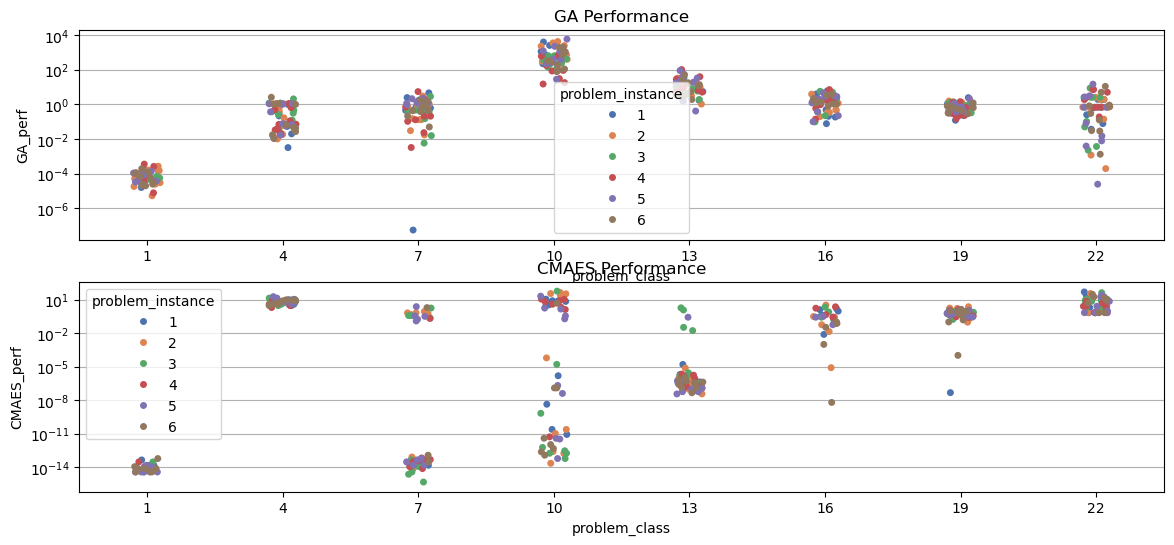

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
f, axes = plt.subplots(2, 1, figsize=(14, 6))

# Set y-scale to logarithmic
for ax in axes:
    ax.set_yscale("log")
    ax.grid()

# Plot GA performance
sns.stripplot(x='problem_class', y='GA_perf', data=df, hue='problem_instance', ax=axes[0], palette="deep")
axes[0].set_title('GA Performance')

# Plot CMAES performance
sns.stripplot(x='problem_class', y='CMAES_perf', data=df, hue='problem_instance', ax=axes[1], palette="deep")
axes[1].set_title('CMAES Performance')

# Save the figure
plt.savefig('figures/performance_combined.pdf', bbox_inches='tight', pad_inches=0)

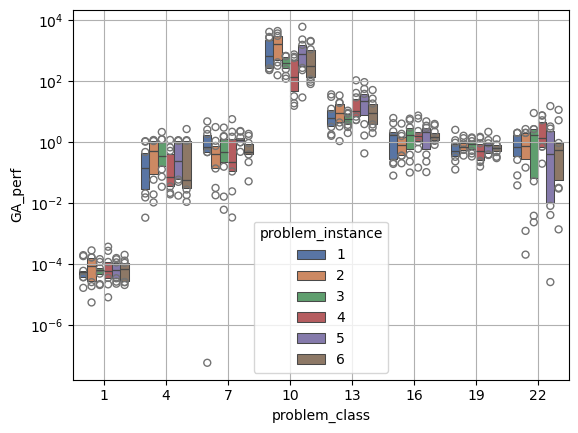

In [12]:
sns.boxenplot(x='problem_class', y='GA_perf', data=df, hue='problem_instance', palette="deep")
plt.yscale("log")
plt.grid()

In [ ]:
sns.boxenplot(x='problem_class', y='GA_perf', data=df, hue='problem_instance', palette="deep")
plt.yscale("log")
plt.grid()

In [8]:
gdf

,problem_class,problem_instance,GA,CMAES,algorithm_run,optimum,GA_perf,CMAES_perf
0,1,1,79.480072,79.480000,4.5,79.48,0.000072,8.526513e-15
1,1,2,394.480100,394.480000,4.5,394.48,0.000100,0.000000e+00
2,1,3,-247.109934,-247.110000,4.5,-247.11,0.000066,2.842171e-15
3,1,4,-152.039894,-152.040000,4.5,-152.04,0.000106,2.842171e-15
4,1,5,-25.249925,-25.250000,4.5,-25.25,0.000075,6.039613e-15
5,1,6,-23.649923,-23.650000,4.5,-23.65,0.000077,1.065814e-14
6,4,1,-461.771803,-455.360062,4.5,-462.09,0.318197,6.729938e+00
7,4,2,78.222126,84.127229,4.5,77.66,0.562126,6.467229e+00
8,4,3,116.292993,122.545212,4.5,115.68,0.612993,6.865212e+00
9,4,4,-3.442920,1.946979,4.5,-3.71,0.267080,5.656979e+00


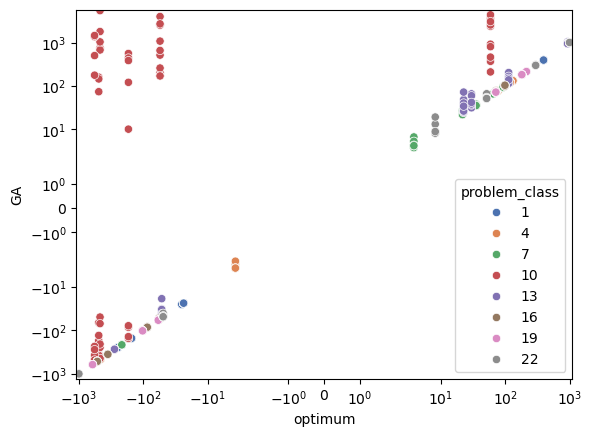

In [9]:
sns.scatterplot(x='optimum', y='GA', data=df, hue='problem_class', palette="deep")
plt.yscale('symlog')
plt.xscale('symlog')